In [1]:
# Import
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# from fastai.structured import add_datepart

# Linear Regression
from sklearn.linear_model import LogisticRegression

In [31]:
# Read data from local repo
my_data = pd.read_csv('data/daily_data_cleaned.csv')

In [32]:
my_data['timestamp'] = pd.to_datetime(my_data['timestamp'], format='%Y-%m-%d')
my_data.index = my_data['timestamp']

In [33]:
my_data.head(5)

,timestamp,action,neg,neu,pos,SlowD,SlowK,SMA,MACD,MACD_Hist,MACD_Signal
timestamp,,,,,,,,,,,
2000-01-03,2000-01-03,1.0,0.051,0.871,0.078,89.5600,89.3097,259.699,8.4011,0.2700,8.1311
2000-01-04,2000-01-04,0.0,0.056,0.904,0.039,90.8006,85.6698,258.285,8.4432,0.3796,8.0636
2000-01-05,2000-01-05,0.0,0.093,0.828,0.079,93.5839,93.7007,256.634,8.3670,0.3983,7.9687
2000-01-06,2000-01-06,0.0,0.079,0.835,0.086,93.6084,93.0314,254.997,8.4148,0.5456,7.8692
2000-01-07,2000-01-07,1.0,0.072,0.838,0.090,93.9506,94.0196,253.739,8.3106,0.5779,7.7327


In [34]:
# Read twitter data
twitter = pd.read_csv('data/AAPL.csv')

In [35]:
twitter['date'] = pd.to_datetime(twitter['date'], format='%Y-%m-%d')
twitter.index = twitter['date']

In [36]:
stock_twitter = pd.concat([my_data, twitter], axis=1, join_axes=[my_data.index])
stock_twitter.head(5)

,timestamp,action,neg,neu,pos,SlowD,SlowK,SMA,MACD,MACD_Hist,MACD_Signal,date,ts_polarity,twitter_volume
timestamp,,,,,,,,,,,,,,
2000-01-03,2000-01-03,1.0,0.051,0.871,0.078,89.5600,89.3097,259.699,8.4011,0.2700,8.1311,NaT,NaN,NaN
2000-01-04,2000-01-04,0.0,0.056,0.904,0.039,90.8006,85.6698,258.285,8.4432,0.3796,8.0636,NaT,NaN,NaN
2000-01-05,2000-01-05,0.0,0.093,0.828,0.079,93.5839,93.7007,256.634,8.3670,0.3983,7.9687,NaT,NaN,NaN
2000-01-06,2000-01-06,0.0,0.079,0.835,0.086,93.6084,93.0314,254.997,8.4148,0.5456,7.8692,NaT,NaN,NaN
2000-01-07,2000-01-07,1.0,0.072,0.838,0.090,93.9506,94.0196,253.739,8.3106,0.5779,7.7327,NaT,NaN,NaN


In [41]:
stock_twitter=stock_twitter.dropna() # drop NaN data due to missing

In [38]:
del stock_twitter['timestamp'] # delete repeated column

In [39]:
del stock_twitter['date'] # delete repeated column

In [11]:
stock_twitter.isnull().sum(axis = 0)

action            0
neg               0
neu               0
pos               0
SlowD             0
SlowK             0
SMA               0
MACD              0
MACD_Hist         0
MACD_Signal       0
ts_polarity       0
twitter_volume    0
dtype: int64

In [54]:
stock_twitter.loc[stock_twitter['action']==1] # examin target column to see if it's imbalance, 1 vs 0

,action,neg,neu,pos,SlowD,SlowK,SMA,MACD,MACD_Hist,MACD_Signal,ts_polarity,twitter_volume
timestamp,,,,,,,,,,,,
2016-01-22,1.0,0.109,0.809,0.082,79.6606,85.1923,75.0608,2.4191,0.1092,2.3099,0.096273,1200.0
2016-01-29,1.0,0.097,0.836,0.066,67.2965,65.6720,73.7313,2.4077,0.1548,2.2529,0.082394,1542.0
2016-02-16,1.0,0.060,0.843,0.097,81.0210,86.3498,68.1872,1.5980,0.0426,1.5553,0.041126,1272.0
2016-03-01,1.0,0.059,0.835,0.106,74.2727,63.1132,65.8090,1.7590,-0.0708,1.8298,0.042563,1427.0
2016-05-16,1.0,0.091,0.811,0.098,33.0112,18.7889,62.0915,-1.9516,-0.4589,-1.4927,0.077478,2587.0
2016-07-27,1.0,0.142,0.757,0.101,9.5907,10.9260,63.9175,-2.3736,-0.4521,-1.9215,0.069447,5173.0
2016-09-14,1.0,0.115,0.801,0.084,37.0065,14.7593,74.4610,-0.4996,-1.0110,0.5114,0.074549,3897.0
2016-09-15,1.0,0.100,0.815,0.086,54.0529,39.3077,74.8690,-0.2453,-1.0094,0.7641,0.111114,3610.0
2016-11-16,1.0,0.091,0.795,0.115,72.2544,53.7573,66.7390,3.4828,0.4052,3.0776,-0.007081,1366.0


# Logistic Regression

In [43]:
from sklearn.model_selection import train_test_split

feature_cols = ['neg', 'neu', 'pos', 'SlowD', 'SlowK', 'SMA', 'MACD', 'MACD_Hist', 'MACD_Signal', 'ts_polarity', 'twitter_volume']
# feature_cols = ['SlowD']
target = 'action'
X = stock_twitter[feature_cols]
y = stock_twitter[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(class_weight = 'balanced') # dataset is imbalanced so we need to add class_weight parameter

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
y_conf=logreg.decision_function(X_test)

/Users/thupham/anaconda3/envs/py3k/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
result = pd.DataFrame({ 'test': y_test, 'pred': y_pred, 'conf': y_conf }, columns=['test','pred','conf'])
result = result[result['pred'] == 1.0]
result.head(5)

,test,pred,conf
timestamp,,,
2018-05-08,0.0,1.0,0.091080
2016-01-26,0.0,1.0,0.190645
2018-06-05,0.0,1.0,0.102611
2019-05-29,0.0,1.0,0.314964
2016-02-26,0.0,1.0,0.887427


In [45]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7777777777777778
Precision: 0.1951219512195122
Recall: 0.5333333333333333


In [46]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[132,  33],
       [  7,   8]])

Text(0.5, 257.44, 'Predicted')

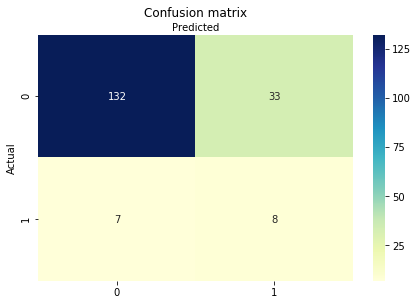

In [47]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Support Vector Machine

In [65]:
from sklearn import svm

# Initiate model
svc = svm.SVC(gamma='scale',kernel='rbf', class_weight={1: 10}) # Add weighted class for unbalanced data set

# Fit model
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
y_pred=svc.predict(X_test)
y_conf=svc.decision_function(X_test)

In [67]:
result = pd.DataFrame({ 'test': y_test, 'pred': y_pred, 'conf': y_conf }, columns=['test','pred','conf'])
result = result[result['pred'] == 1.0]
result

,test,pred,conf
timestamp,,,
2017-02-01,1.0,1.0,0.217351
2017-11-03,1.0,1.0,0.976982
2017-08-02,1.0,1.0,0.814392


In [68]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.2


In [69]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[165,   0],
       [ 12,   3]])

Text(0.5, 257.44, 'Predicted')

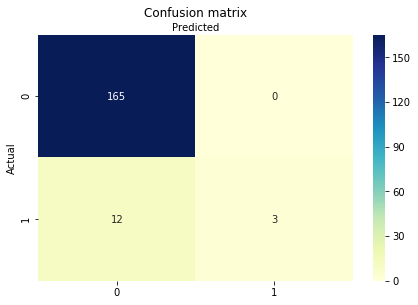

In [70]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Keras Sequential

In [71]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [78]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU

# Import `Dense` from `keras.layers`
from keras.layers import Dense


# Initialize the constructor
model = Sequential()
# model.add(LeakyReLU(alpha=0.5))
# Add an input layer 
model.add(Dense(12, activation='tanh', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='tanh'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
718/718 [==============================] - 1s 1ms/step - loss: 0.2734 - acc: 0.9290
Epoch 2/20
718/718 [==============================] - 1s 901us/step - loss: 0.1318 - acc: 0.9680
Epoch 3/20
718/718 [==============================] - 1s 956us/step - loss: 0.1274 - acc: 0.9680
Epoch 4/20
718/718 [==============================] - 1s 955us/step - loss: 0.1248 - acc: 0.9680
Epoch 5/20
718/718 [==============================] - 1s 1ms/step - loss: 0.1237 - acc: 0.9694
Epoch 6/20
718/718 [==============================] - 1s 941us/step - loss: 0.1223 - acc: 0.9694
Epoch 7/20
718/718 [==============================] - 1s 811us/step - loss: 0.1210 - acc: 0.9680
Epoch 8/20
718/718 [==============================] - 1s 908us/step - loss: 0.1198 - acc: 0.9708
Epoch 9/20
718/718 [==============================] - 1s 839us/step - loss: 0.1189 - acc: 0.9694
Epoch 10/20
718/718 [==============================] - 1s 909us/step - loss: 0.1176

In [80]:
y_pred = model.predict_classes(X_test)
y_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

In [82]:
# Precision 
precision_score(y_test, y_pred)

1.0

In [83]:
# Recall
recall_score(y_test, y_pred)

0.06666666666666667

In [84]:
# Accucracy
accuracy_score(y_test, y_pred)

0.9222222222222223

Text(0.5, 257.44, 'Predicted')

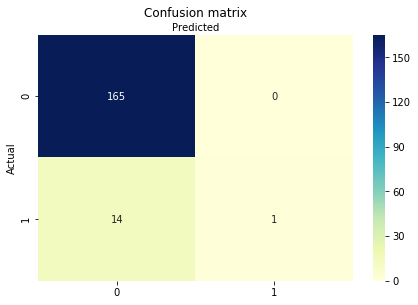

In [85]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [86]:
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)
mse_value

0.2676266659465101

In [87]:
# F1 score
f1_score(y_test,y_pred)

0.125